# Определение перспективного тарифа для телеком компании

Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

## Задачи проекта
### [Шаг 1. Откройте файл с данными и изучите общую информацию](#step1)

### [Шаг 2. Подготовьте данные](#step2)

- Приведите данные к нужным типам;
- Найдите и исправьте ошибки в данных.

Поясните, какие ошибки вы нашли и как их исправили. Обратите внимание, что длительность многих звонков — 0.0 минут. Это могут быть пропущенные звонки. Обрабатывать ли эти нулевые значения, решать вам — оцените, как их отсутствие повлияет на результаты анализа.

Посчитайте для каждого пользователя:
 - количество сделанных звонков и израсходованных минут разговора по месяцам;
 - количество отправленных сообщений по месяцам;
 - объем израсходованного интернет-трафика по месяцам;
 - помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

### [Шаг 3. Проанализируйте данные](#step3)
Опишите поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения.

### [Шаг 4. Проверьте гипотезы](#step4)
 - средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
 - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;
Пороговое значение alpha задайте самостоятельно.
Поясните:
 - как вы формулировали нулевую и альтернативную гипотезы;
 - какой критерий использовали для проверки гипотез и почему.

### [Шаг 5. Напишите общий вывод](#step5)

# Этапы выполнения проекта

## Шаг 1. Откроем файлы с данными и изучим общую информацию. <a id='step1'></a>

In [1]:
import pandas as pd
import calendar
import math
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

In [2]:
data_calls = pd.read_csv('/datasets/calls.csv')
data_internet = pd.read_csv('/datasets/internet.csv')
data_messages = pd.read_csv('/datasets/messages.csv')
data_tariffs = pd.read_csv('/datasets/tariffs.csv')
data_users = pd.read_csv('/datasets/users.csv')

In [3]:
data_calls

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499


In [4]:
data_internet

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...,...
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499


In [5]:
data_messages

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


In [6]:
data_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [7]:
data_users

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


In [8]:
data_calls.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [9]:
data_internet.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [10]:
data_messages.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [11]:
data_tariffs.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [12]:
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [13]:
data_calls.describe()

,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


In [14]:
data_internet.describe()

,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


In [15]:
data_messages.describe()

,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


In [16]:
data_tariffs.describe()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
std,671.751442,10861.160159,1767.766953,989.949494,35.355339,1.414214,1.414214
min,50.000000,15360.000000,500.000000,550.000000,150.000000,1.000000,1.000000
25%,287.500000,19200.000000,1125.000000,900.000000,162.500000,1.500000,1.500000
50%,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
75%,762.500000,26880.000000,2375.000000,1600.000000,187.500000,2.500000,2.500000
max,1000.000000,30720.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000


In [17]:
data_users.describe()

,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


In [18]:
print(data_calls.duplicated().sum())
print(data_internet.duplicated().sum())
print(data_messages.duplicated().sum())
print(data_tariffs.duplicated().sum())
print(data_users.duplicated().sum())

0
0
0
0
0


In [19]:
data_internet['Unnamed: 0'].describe()

count    149396.000000
mean      74697.500000
std       43127.054745
min           0.000000
25%       37348.750000
50%       74697.500000
75%      112046.250000
max      149395.000000
Name: Unnamed: 0, dtype: float64

In [20]:
data_users['age'].unique()

array([52, 41, 59, 23, 68, 67, 21, 65, 63, 24, 26, 44, 38, 36, 64, 58, 73,
       71, 61, 72, 42, 56, 32, 62, 20, 51, 28, 66, 31, 37, 47, 40, 69, 48,
       33, 39, 43, 46, 45, 55, 53, 34, 49, 25, 18, 70, 50, 19, 54, 60, 29,
       27, 74, 22, 30, 75, 57, 35])

In [21]:
data_users['tariff'].unique()

array(['ultra', 'smart'], dtype=object)

In [22]:
data_users['city'].unique()

array(['Краснодар', 'Москва', 'Стерлитамак', 'Новокузнецк',
       'Набережные Челны', 'Ульяновск', 'Челябинск', 'Пермь', 'Тюмень',
       'Самара', 'Санкт-Петербург', 'Иваново', 'Чебоксары', 'Омск', 'Уфа',
       'Томск', 'Чита', 'Мурманск', 'Петрозаводск', 'Тверь',
       'Екатеринбург', 'Махачкала', 'Вологда', 'Череповец', 'Ярославль',
       'Сочи', 'Хабаровск', 'Ставрополь', 'Рязань', 'Улан-Удэ', 'Тула',
       'Саратов', 'Ростов-на-Дону', 'Казань', 'Иркутск', 'Курск',
       'Калуга', 'Якутск', 'Астрахань', 'Химки', 'Владикавказ',
       'Волгоград', 'Саранск', 'Ижевск', 'Новосибирск', 'Брянск',
       'Тольятти', 'Нижний Тагил', 'Орёл', 'Белгород', 'Воронеж',
       'Волжский', 'Курган', 'Барнаул', 'Красноярск', 'Архангельск',
       'Липецк', 'Кемерово', 'Киров', 'Сургут', 'Пенза', 'Магнитогорск',
       'Нижний Новгород', 'Кострома', 'Владивосток', 'Тамбов', 'Балашиха',
       'Севастополь', 'Калининград', 'Оренбург', 'Смоленск',
       'Нижневартовск', 'Владимир', 'Новороссий

### Вывод
<p>message_date, reg_date, session_date, churn_date стоит привести к форму даты</p>
<p>Столбец data_internet['Unnamed: 0'] из data_internet можно удалить, так как он не несет за собой никакой полезной информации (о нем нет сведений в легенде по таблицам)</p>
<p>Минимальная длительность звонков равна 0 минут. Пока оставим эти данные в таком виде.  </p>
<p>Прочая дополнительная информация - максимальная длина разговора составляет 38 минут, дубликатов не обнаружено. Никаких выбросов не обнаружено.  </p>


## Шаг 2. Подготовим данные <a id='step2'></a>

Удалим бесполезный столбец

In [23]:
del data_internet['Unnamed: 0']

In [24]:
data_internet

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...
149391,1499_152,318.90,2018-10-03,1499
149392,1499_153,490.13,2018-12-14,1499
149393,1499_154,0.00,2018-10-27,1499
149394,1499_155,1246.32,2018-11-26,1499


Переведем даты в нужный нам формат

In [25]:
data_calls['call_date'] = pd.to_datetime(data_calls['call_date'], format='%Y.%m.%d')
data_internet['session_date'] = pd.to_datetime(data_internet['session_date'], format='%Y.%m.%d')
data_messages['message_date'] = pd.to_datetime(data_messages['message_date'], format='%Y.%m.%d')
data_users['reg_date'] = pd.to_datetime(data_users['reg_date'], format='%Y.%m.%d')
data_users['churn_date'] = pd.to_datetime(data_users['churn_date'], format='%Y.%m.%d')

In [26]:
data_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB


Округлим звонки и мегабайты вверх.

In [27]:
data_calls['duration'] = data_calls['duration'].apply(lambda x: math.ceil(x))


In [28]:
data_internet['mb_used'] = data_internet['mb_used'].apply(lambda x: math.ceil(x))

Количество звонков, с продолжительностью 0 - больше всего, что составляет практически 20% от всех значений с продолжительностью. Теоретически это могут быть пропущенные звонки, и можно их не округлять до одной минуты.  

In [29]:
data_calls['duration'].value_counts()

0     39613
7     11510
6     11457
5     11411
8     11272
9     10973
4     10918
3     10362
10    10186
11     9385
2      9194
12     8448
1      8402
13     7486
14     6554
15     5505
16     4551
17     3671
18     2984
19     2411
20     1806
21     1304
22      975
23      720
24      468
25      363
26      257
27      151
28      104
29       56
30       39
31       30
32       17
33       10
35        5
34        3
36        2
37        2
38        2
Name: duration, dtype: int64

In [30]:
data_calls['duration'].value_counts(normalize=True)

0     0.195516
7     0.056809
6     0.056548
5     0.056321
8     0.055635
9     0.054159
4     0.053888
3     0.051143
10    0.050275
11    0.046321
2     0.045378
12    0.041696
1     0.041469
13    0.036948
14    0.032348
15    0.027171
16    0.022462
17    0.018119
18    0.014728
19    0.011900
20    0.008914
21    0.006436
22    0.004812
23    0.003554
24    0.002310
25    0.001792
26    0.001268
27    0.000745
28    0.000513
29    0.000276
30    0.000192
31    0.000148
32    0.000084
33    0.000049
35    0.000025
34    0.000015
36    0.000010
37    0.000010
38    0.000010
Name: duration, dtype: float64

Пустые значения в столбце churn_date исправлять не следует, поскольку эта дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных).

Посчитаем для каждого пользователя количество сделанных звонков и израсходованных минут разговора по месяцам

In [31]:
data_calls['month'] = data_calls['call_date'].dt.month

In [32]:
data_calls

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0,1000,7
1,1000_1,2018-08-17,0,1000,8
2,1000_2,2018-06-11,3,1000,6
3,1000_3,2018-09-21,14,1000,9
4,1000_4,2018-12-15,6,1000,12
...,...,...,...,...,...
202602,1499_215,2018-12-26,1,1499,12
202603,1499_216,2018-10-18,19,1499,10
202604,1499_217,2018-11-10,11,1499,11
202605,1499_218,2018-10-06,5,1499,10


In [33]:
data_calls['month'] = data_calls['month'].apply(lambda x: calendar.month_abbr[x])

In [34]:
data_calls

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0,1000,Jul
1,1000_1,2018-08-17,0,1000,Aug
2,1000_2,2018-06-11,3,1000,Jun
3,1000_3,2018-09-21,14,1000,Sep
4,1000_4,2018-12-15,6,1000,Dec
...,...,...,...,...,...
202602,1499_215,2018-12-26,1,1499,Dec
202603,1499_216,2018-10-18,19,1499,Oct
202604,1499_217,2018-11-10,11,1499,Nov
202605,1499_218,2018-10-06,5,1499,Oct


Создадим сводную таблицу с количеством и продолижительностью звонков помесячно для кадждого пользователя

In [35]:
data_calls_pivot = data_calls.pivot_table(index=['user_id','month'], values='duration', aggfunc=['count','sum']).reset_index()

In [36]:
data_calls_pivot.columns=['user_id','month','count duration','sum duration']

In [37]:
data_calls_pivot

,user_id,month,count duration,sum duration
0,1000,Aug,52,408
1,1000,Dec,46,333
2,1000,Jul,47,340
3,1000,Jun,43,172
4,1000,May,22,159
...,...,...,...,...
3169,1498,Sep,59,471
3170,1499,Dec,69,492
3171,1499,Nov,74,612
3172,1499,Oct,68,449


In [38]:
data_calls_pivot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3174 entries, 0 to 3173
Data columns (total 4 columns):
user_id           3174 non-null int64
month             3174 non-null object
count duration    3174 non-null int64
sum duration      3174 non-null int64
dtypes: int64(3), object(1)
memory usage: 99.3+ KB


Посчитаем для каждого пользователя количество отправленных сообщений по месяцам.


In [39]:
data_messages['month'] = data_messages['message_date'].dt.month
data_messages['month'] = data_messages['month'].apply(lambda x: calendar.month_abbr[x])

In [40]:
data_messages_pivot = data_messages.pivot_table(index=['user_id','month'], aggfunc='count').reset_index()

In [41]:
data_messages_pivot

,user_id,month,id,message_date
0,1000,Aug,81,81
1,1000,Dec,70,70
2,1000,Jul,75,75
3,1000,Jun,60,60
4,1000,May,22,22
...,...,...,...,...
2712,1498,Sep,44,44
2713,1499,Dec,66,66
2714,1499,Nov,59,59
2715,1499,Oct,48,48


In [42]:
data_messages_pivot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2717 entries, 0 to 2716
Data columns (total 4 columns):
user_id         2717 non-null int64
month           2717 non-null object
id              2717 non-null int64
message_date    2717 non-null int64
dtypes: int64(3), object(1)
memory usage: 85.0+ KB


In [43]:
data_messages_pivot.columns=['user_id','month', 'count_message','del']

In [44]:
del data_messages_pivot['del']

In [45]:
data_messages_pivot

,user_id,month,count_message
0,1000,Aug,81
1,1000,Dec,70
2,1000,Jul,75
3,1000,Jun,60
4,1000,May,22
...,...,...,...
2712,1498,Sep,44
2713,1499,Dec,66
2714,1499,Nov,59
2715,1499,Oct,48


Посчитаем для каждого пользователя объем израсходованного интернет-трафика по месяцам

In [46]:
data_internet['month'] = data_internet['session_date'].dt.month
data_internet['month'] = data_internet['month'].apply(lambda x: calendar.month_abbr[x])

In [47]:
data_internet_pivot = data_internet.pivot_table(index=['user_id','month'], values='mb_used', aggfunc='sum').reset_index()

In [48]:
data_internet_pivot

,user_id,month,mb_used
0,1000,Aug,14070
1,1000,Dec,9827
2,1000,Jul,14016
3,1000,Jun,23257
4,1000,May,2256
...,...,...,...
3198,1498,Sep,22166
3199,1499,Dec,13077
3200,1499,Nov,17984
3201,1499,Oct,17809


In [49]:
data_internet_pivot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3203 entries, 0 to 3202
Data columns (total 3 columns):
user_id    3203 non-null int64
month      3203 non-null object
mb_used    3203 non-null int64
dtypes: int64(2), object(1)
memory usage: 75.2+ KB


Определим количество строк в таблице, чтобы определить порядок объединения таблиц

In [50]:
print(len(data_internet_pivot))
print(len(data_messages_pivot))
print(len(data_calls_pivot))

3203
2717
3174


In [51]:
result = data_calls_pivot.merge(data_internet_pivot, how='left', on=['user_id','month'])

In [52]:
result

,user_id,month,count duration,sum duration,mb_used
0,1000,Aug,52,408,14070.0
1,1000,Dec,46,333,9827.0
2,1000,Jul,47,340,14016.0
3,1000,Jun,43,172,23257.0
4,1000,May,22,159,2256.0
...,...,...,...,...,...
3169,1498,Sep,59,471,22166.0
3170,1499,Dec,69,492,13077.0
3171,1499,Nov,74,612,17984.0
3172,1499,Oct,68,449,17809.0


In [53]:
result = result.merge(data_messages_pivot, how='left', on=['user_id','month'])

In [54]:
result

,user_id,month,count duration,sum duration,mb_used,count_message
0,1000,Aug,52,408,14070.0,81.0
1,1000,Dec,46,333,9827.0,70.0
2,1000,Jul,47,340,14016.0,75.0
3,1000,Jun,43,172,23257.0,60.0
4,1000,May,22,159,2256.0,22.0
...,...,...,...,...,...,...
3169,1498,Sep,59,471,22166.0,44.0
3170,1499,Dec,69,492,13077.0,66.0
3171,1499,Nov,74,612,17984.0,59.0
3172,1499,Oct,68,449,17809.0,48.0


In [55]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3174 entries, 0 to 3173
Data columns (total 6 columns):
user_id           3174 non-null int64
month             3174 non-null object
count duration    3174 non-null int64
sum duration      3174 non-null int64
mb_used           3163 non-null float64
count_message     2678 non-null float64
dtypes: float64(2), int64(3), object(1)
memory usage: 173.6+ KB


Проверим, нормально ли все у нас смержилось.

In [56]:
result.query('user_id == 1270 and month =="Aug"')

,user_id,month,count duration,sum duration,mb_used,count_message
1681,1270,Aug,55,376,11596.0,47.0


In [57]:
data_calls_pivot.query('user_id == 1270 and month =="Aug"')


,user_id,month,count duration,sum duration
1681,1270,Aug,55,376


In [58]:
data_internet_pivot.query('user_id == 1270 and month =="Aug"')


,user_id,month,mb_used
1706,1270,Aug,11596


In [59]:
data_messages_pivot.query('user_id == 1270 and month =="Aug"')

,user_id,month,count_message
1383,1270,Aug,47


Вроде все гуд. Добавим и самих пользователей теперь


In [60]:
df = result.merge(data_users, how='left', on='user_id')

In [61]:
df

,user_id,month,count duration,sum duration,mb_used,count_message,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,Aug,52,408,14070.0,81.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,Dec,46,333,9827.0,70.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,Jul,47,340,14016.0,75.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,Jun,43,172,23257.0,60.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,May,22,159,2256.0,22.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3169,1498,Sep,59,471,22166.0,44.0,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart
3170,1499,Dec,69,492,13077.0,66.0,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart
3171,1499,Nov,74,612,17984.0,59.0,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart
3172,1499,Oct,68,449,17809.0,48.0,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart


Поскольку у нас были Nan в некоторых строках, то заменим их на 0, чтобы в дальнейшем корректно рассчитать сумму выручки.

In [62]:
df.fillna(0, inplace=True)

Добавим теперь информацию по тарифам

In [63]:
data_tariffs.rename(columns={'tariff_name': 'tariff'}, inplace=True)
df = df.merge(data_tariffs, how='left', on='tariff')

In [64]:
df

,user_id,month,count duration,sum duration,mb_used,count_message,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,Aug,52,408,14070.0,81.0,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,Dec,46,333,9827.0,70.0,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,Jul,47,340,14016.0,75.0,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,Jun,43,172,23257.0,60.0,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,May,22,159,2256.0,22.0,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3169,1498,Sep,59,471,22166.0,44.0,68,2018-10-25 00:00:00,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,50,15360,500,550,200,3,3
3170,1499,Dec,69,492,13077.0,66.0,35,0,Пермь,Гектор,Корнилов,2018-09-27,smart,50,15360,500,550,200,3,3
3171,1499,Nov,74,612,17984.0,59.0,35,0,Пермь,Гектор,Корнилов,2018-09-27,smart,50,15360,500,550,200,3,3
3172,1499,Oct,68,449,17809.0,48.0,35,0,Пермь,Гектор,Корнилов,2018-09-27,smart,50,15360,500,550,200,3,3


Имеем сводную таблицу, по которой сможем ответить на вопрос о помесячной выручки с каждого пользователя.

In [65]:
df.rename(columns={'count duration': 'count_duration','sum duration':'sum_duration'}, inplace=True)

Сформирем новый столбец, который будет содержать в себе кол-во перерасходанных минут (больше, чем в тарифе). 

In [66]:
df['revenue_calls'] = df['minutes_included'] - df['sum_duration']
df.loc[df['revenue_calls'] > 0,'revenue_calls'] = 0
df['revenue_calls'] = abs(df['revenue_calls'])
df['revenue_calls'] = df['revenue_calls'] * df['rub_per_minute']

In [67]:
df['revenue_calls']

0         0
1         0
2         0
3         0
4         0
       ... 
3169      0
3170      0
3171    336
3172      0
3173      0
Name: revenue_calls, Length: 3174, dtype: int64

In [68]:
df['revenue_calls'].sort_values(ascending=False).head(20)

1358    2805
2852    1932
1620    1722
1450    1566
3104    1521
1999    1515
1076    1500
2824    1395
1959    1392
2930    1362
2936    1299
2896    1290
578     1290
325     1218
2185    1215
1765    1209
186     1173
1256    1170
2897    1167
2898    1167
Name: revenue_calls, dtype: int64

Как видно, некоторые пользователи довольно много тратят на звонки. 

Проделаем тоже самое с сообщениями.

In [69]:
df['revenue_messages'] = df['messages_included'] - df['count_message']
df.loc[df['revenue_messages'] > 0,'revenue_messages'] = 0
df['revenue_messages'] = abs(df['revenue_messages'])
df['revenue_messages'] = df['revenue_messages'] * df['rub_per_message']

In [70]:
df['revenue_messages'].sort_values(ascending=False).head(20)

692     279.0
2031    267.0
2027    261.0
2032    258.0
2028    252.0
2025    252.0
1340    237.0
3101    231.0
2026    225.0
2030    222.0
3100    213.0
1786    201.0
1850    195.0
1791    192.0
1782    186.0
896     183.0
321     183.0
894     183.0
1787    180.0
2847    177.0
Name: revenue_messages, dtype: float64

Расчет с интернетом строится чуть по другому:

In [71]:
df['revenue_internet'] = df['mb_per_month_included'] - df['mb_used']
df.loc[df['revenue_internet'] > 0,'revenue_internet'] = 0
df['revenue_internet'] = abs(df['revenue_internet'])
df['revenue_internet'] = df['revenue_internet']/1024

In [72]:
df['revenue_internet']

0       0.000000
1       0.000000
2       0.000000
3       0.000000
4       0.000000
          ...   
3169    6.646484
3170    0.000000
3171    2.562500
3172    2.391602
3173    0.000000
Name: revenue_internet, Length: 3174, dtype: float64

Округлим гигабайты вверх.

In [73]:
df.loc[df['revenue_internet'].notnull(), 'revenue_internet'] = df.loc[df['revenue_internet'].notnull(), 'revenue_internet'].apply(lambda x: math.ceil(x))


In [74]:
df['revenue_internet']

0       0
1       0
2       0
3       0
4       0
       ..
3169    7
3170    0
3171    3
3172    3
3173    0
Name: revenue_internet, Length: 3174, dtype: int64

In [75]:
df['revenue_internet'] = df['revenue_internet'] * df['rub_per_gb']

Подсчитаем итоговую выручку. 

In [76]:
df['revenue_total'] = df['revenue_internet'] + df['revenue_messages'] + df['revenue_calls'] + df['rub_monthly_fee']

In [77]:
df['revenue_total']

0       1950.0
1       1950.0
2       1950.0
3       1950.0
4       1950.0
         ...  
3169    1950.0
3170     598.0
3171    1513.0
3172    1150.0
3173     550.0
Name: revenue_total, Length: 3174, dtype: float64

In [78]:
df['revenue_total'].sort_values()

3173     550.0
1561     550.0
1560     550.0
2800     550.0
1559     550.0
         ...  
1792    5321.0
1620    5672.0
3105    5680.0
259     5709.0
3104    6770.0
Name: revenue_total, Length: 3174, dtype: float64

In [79]:
df.head(20)

,user_id,month,count_duration,sum_duration,mb_used,count_message,age,churn_date,city,first_name,...,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,revenue_calls,revenue_messages,revenue_internet,revenue_total
0,1000,Aug,52,408,14070.0,81.0,52,0,Краснодар,Рафаил,...,30720,3000,1950,150,1,1,0,0.0,0,1950.0
1,1000,Dec,46,333,9827.0,70.0,52,0,Краснодар,Рафаил,...,30720,3000,1950,150,1,1,0,0.0,0,1950.0
2,1000,Jul,47,340,14016.0,75.0,52,0,Краснодар,Рафаил,...,30720,3000,1950,150,1,1,0,0.0,0,1950.0
3,1000,Jun,43,172,23257.0,60.0,52,0,Краснодар,Рафаил,...,30720,3000,1950,150,1,1,0,0.0,0,1950.0
4,1000,May,22,159,2256.0,22.0,52,0,Краснодар,Рафаил,...,30720,3000,1950,150,1,1,0,0.0,0,1950.0
5,1000,Nov,43,338,14768.0,58.0,52,0,Краснодар,Рафаил,...,30720,3000,1950,150,1,1,0,0.0,0,1950.0
6,1000,Oct,57,350,14717.0,73.0,52,0,Краснодар,Рафаил,...,30720,3000,1950,150,1,1,0,0.0,0,1950.0
7,1000,Sep,58,466,14581.0,57.0,52,0,Краснодар,Рафаил,...,30720,3000,1950,150,1,1,0,0.0,0,1950.0
8,1001,Dec,63,414,14053.0,0.0,41,0,Москва,Иван,...,15360,500,550,200,3,3,0,0.0,0,550.0
9,1001,Nov,59,430,18452.0,0.0,41,0,Москва,Иван,...,15360,500,550,200,3,3,0,0.0,800,1350.0


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3174 entries, 0 to 3173
Data columns (total 24 columns):
user_id                  3174 non-null int64
month                    3174 non-null object
count_duration           3174 non-null int64
sum_duration             3174 non-null int64
mb_used                  3174 non-null float64
count_message            3174 non-null float64
age                      3174 non-null int64
churn_date               3174 non-null object
city                     3174 non-null object
first_name               3174 non-null object
last_name                3174 non-null object
reg_date                 3174 non-null datetime64[ns]
tariff                   3174 non-null object
messages_included        3174 non-null int64
mb_per_month_included    3174 non-null int64
minutes_included         3174 non-null int64
rub_monthly_fee          3174 non-null int64
rub_per_gb               3174 non-null int64
rub_per_message          3174 non-null int64
rub_per_minute     

Ежемесячно пользователи тратят на связь от 550 до 6770 рублей.

## Шаг 3. Проведем анализ данных. <a id='step3'></a>
Ответим на вопрос: Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитаем среднее количество, дисперсию и стандартное отклонение. Построим гистограммы и опишем распределения.

In [81]:
df['revenue_total'].describe()

count    3174.000000
mean     1528.182420
std       801.873337
min       550.000000
25%       750.000000
50%      1638.500000
75%      1950.000000
max      6770.000000
Name: revenue_total, dtype: float64

In [82]:
(df.groupby('tariff')
  .agg({'revenue_total':['count', 'sum','median','mean','var','std']})
  .style.format("{:.2f}"))

Средняя выручка с тарифов Смарт меньше, чем выручка с тарифов Ультра. Стандартное отклонение и дисперсия у пользователей тарифов Ультра ниже. Это обусловлено тем, что пользователи реже выходят за рамки лимитов.

<p>Рассмотрим, сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц.</p>

In [83]:
df_calls_pivot = df.pivot_table(index=['tariff','month'], values='sum_duration', aggfunc='sum').reset_index()

Добавим столбец sum_duration/user, который будет отображать, сколько минут приходится на одного пользователя. 

In [84]:
df_calls_pivot.loc[(df_calls_pivot['tariff']== 'smart'), 'sum_duration/user'] = df_calls_pivot['sum_duration']/len(df.query('tariff == "smart"'))
df_calls_pivot.loc[(df_calls_pivot['tariff']== 'ultra'), 'sum_duration/user'] = df_calls_pivot['sum_duration']/len(df.query('tariff == "ultra"'))

In [85]:
df_calls_pivot

,tariff,month,sum_duration,sum_duration/user
0,smart,Apr,41119,18.497076
1,smart,Aug,99045,44.554656
2,smart,Dec,161275,72.548358
3,smart,Feb,17324,7.793072
4,smart,Jan,6931,3.117859
5,smart,Jul,82079,36.922627
6,smart,Jun,64885,29.188034
7,smart,Mar,30034,13.510571
8,smart,May,54618,24.569501
9,smart,Nov,137544,61.873144


In [86]:
df_messages_pivot = df.pivot_table(index=['tariff','month'], values='count_message', aggfunc='sum').reset_index()
df_messages_pivot.loc[(df_messages_pivot['tariff']== 'smart'), 'count_message/user'] = df_messages_pivot['count_message']/len(df.query('tariff == "smart"'))
df_messages_pivot.loc[(df_messages_pivot['tariff']== 'ultra'), 'count_message/user'] = df_messages_pivot['count_message']/len(df.query('tariff == "ultra"'))

In [87]:
df_messages_pivot

,tariff,month,count_message,count_message/user
0,smart,Apr,3443.0,1.548808
1,smart,Aug,7888.0,3.548358
2,smart,Dec,12095.0,5.440846
3,smart,Feb,1397.0,0.628430
4,smart,Jan,620.0,0.278902
5,smart,Jul,6784.0,3.051732
6,smart,Jun,5430.0,2.442645
7,smart,Mar,2453.0,1.103464
8,smart,May,4762.0,2.142150
9,smart,Nov,10748.0,4.834908


In [88]:
df_internet_pivot = df.pivot_table(index=['tariff','month'], values='mb_used', aggfunc='sum').reset_index()
df_internet_pivot.loc[(df_internet_pivot['tariff']== 'smart'), 'mb_used/user'] = df_internet_pivot['mb_used']/len(df.query('tariff == "smart"'))
df_internet_pivot.loc[(df_internet_pivot['tariff']== 'ultra'), 'mb_used/user'] = df_internet_pivot['mb_used']/len(df.query('tariff == "ultra"'))

In [89]:
df_internet_pivot

,tariff,month,mb_used,mb_used/user
0,smart,Apr,1509702.0,679.128205
1,smart,Aug,3897495.0,1753.259109
2,smart,Dec,6094772.0,2741.687809
3,smart,Feb,673461.0,302.951417
4,smart,Jan,289831.0,130.378318
5,smart,Jul,3168466.0,1425.310841
6,smart,Jun,2581165.0,1161.117859
7,smart,Mar,1164537.0,523.858300
8,smart,May,2231353.0,1003.757535
9,smart,Nov,5328424.0,2396.951867


Объединим данные таблицы

In [90]:
df_pivot = pd.merge(df_calls_pivot, df_messages_pivot, how='left', on=['tariff','month'])

In [91]:
df_pivot = pd.merge(df_pivot, df_internet_pivot, how='left', on=['tariff','month'])

In [92]:
df_pivot

,tariff,month,sum_duration,sum_duration/user,count_message,count_message/user,mb_used,mb_used/user
0,smart,Apr,41119,18.497076,3443.0,1.548808,1509702.0,679.128205
1,smart,Aug,99045,44.554656,7888.0,3.548358,3897495.0,1753.259109
2,smart,Dec,161275,72.548358,12095.0,5.440846,6094772.0,2741.687809
3,smart,Feb,17324,7.793072,1397.0,0.628430,673461.0,302.951417
4,smart,Jan,6931,3.117859,620.0,0.278902,289831.0,130.378318
5,smart,Jul,82079,36.922627,6784.0,3.051732,3168466.0,1425.310841
6,smart,Jun,64885,29.188034,5430.0,2.442645,2581165.0,1161.117859
7,smart,Mar,30034,13.510571,2453.0,1.103464,1164537.0,523.858300
8,smart,May,54618,24.569501,4762.0,2.142150,2231353.0,1003.757535
9,smart,Nov,137544,61.873144,10748.0,4.834908,5328424.0,2396.951867


Построим диаграмму в зависимости от звонков по всем пользователям.

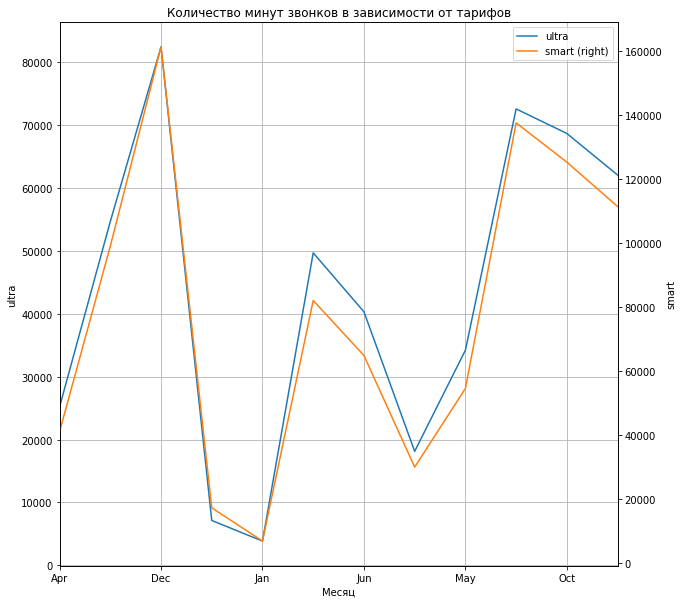

In [93]:
fig, ax = plt.subplots()
(df_pivot
        .query('tariff == "ultra"')
        .plot(x='month', y='sum_duration', figsize=(10, 10), grid = True, ax = ax, rot=0, label='ultra')
)
plt.xlabel('Месяц')
(df_pivot
        .query('tariff == "smart"')
        .plot(x = 'month', y = 'sum_duration', figsize=(10, 10), grid = True, ax = ax,  secondary_y = True, rot=0, label='smart')
)
plt.title('Количество минут звонков в зависимости от тарифов')
plt.ylabel('smart')
ax.set_xlabel("Месяц")
ax.set_ylabel("ultra")
plt.show()


Далее я постарался сделать столбчатую диаграму по двум параметрам. Очень долго искал оптимальное решение, как можно обойтись без объявления лишней переменной, но так и не удалось.

Если ты подскажешь, было бы клево!)

Text(0.5, 1.0, 'Количество минут звонков в зависимости от тарифов по всем пользователям')

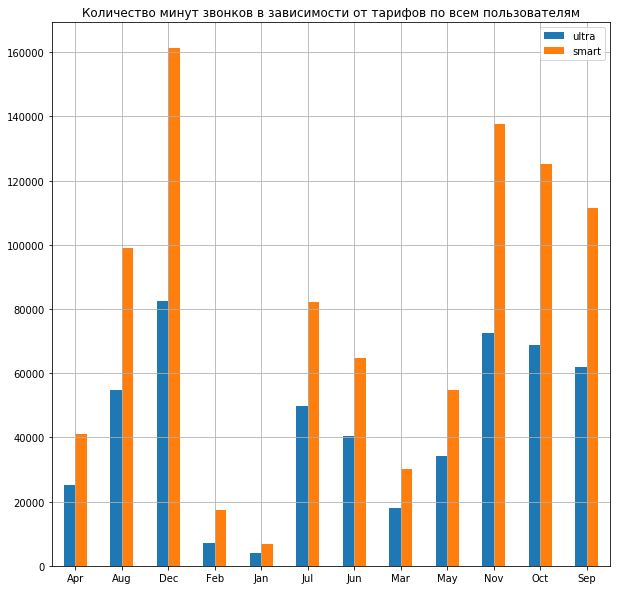

In [94]:
month = ['Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May','Nov', 'Oct', 'Sep']
df1 = pd.DataFrame({'ultra': df_pivot[df_pivot['tariff'] == 'ultra']['sum_duration'].array, 'smart': df_pivot[df_pivot['tariff'] == 'smart']['sum_duration'].array}, index=month)
ax = df1.plot.bar(rot=0, figsize=(10, 10), grid = True, title ="1")
plt.title('Количество минут звонков в зависимости от тарифов по всем пользователям')

Рассмотрим помесячное отношение длительности звонков на одного пользователя тарифа.


Text(0.5, 1.0, 'Количество минут звонков в зависимости от тарифов на одного пользователя')

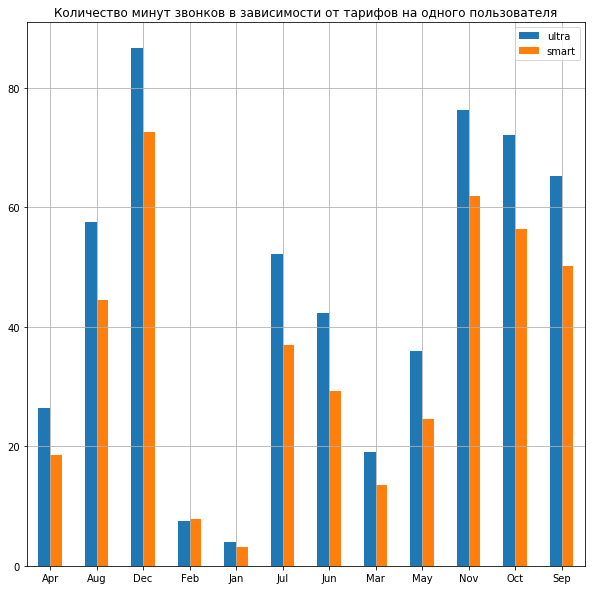

In [95]:
month = ['Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May','Nov', 'Oct', 'Sep']
df2 = pd.DataFrame({'ultra': df_pivot[df_pivot['tariff'] == 'ultra']['sum_duration/user'].array, 'smart': df_pivot[df_pivot['tariff'] == 'smart']['sum_duration/user'].array}, index=month)

ax = df2.plot.bar(rot=0, figsize=(10, 10), grid = True)
plt.title('Количество минут звонков в зависимости от тарифов на одного пользователя')

In [96]:
df_pivot[df_pivot['tariff'] == 'ultra']['sum_duration/user'].mean() / df_pivot[df_pivot['tariff'] == 'smart']['sum_duration/user'].mean()

1.301596974180775

Средняя ежемесячная длительность звонков всех пользователей тарифов "Смарт" выше практически в 2 раза, чем у пользователей тарифов "Ультра". А вот если рассматривать данные в разрезе на одного пользователя, то картина меняется. Пользователи с тарифа Ультра больше времени разговаривают (на 30%).
Стоит также отметить, что с сентября по декабрь пользователи чаще общаются по телефону. 

In [97]:
ultra_count_message = df_pivot[df_pivot['tariff'] == 'ultra']['count_message']
smart_count_message = df_pivot[df_pivot['tariff'] == 'smart']['count_message']

Text(0.5, 1.0, 'Количество отправленных сообщений в зависимости от тарифов всех пользователей')

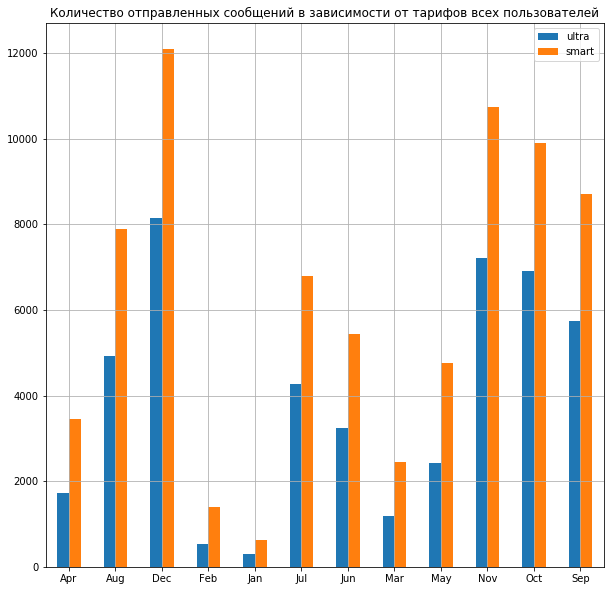

In [98]:
month = ['Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May','Nov', 'Oct', 'Sep']
df3 = pd.DataFrame({'ultra': ultra_count_message.array, 'smart': smart_count_message.array}, index=month)

ax = df3.plot.bar(rot=0, figsize=(10, 10), grid = True)
plt.title('Количество отправленных сообщений в зависимости от тарифов всех пользователей')

Text(0.5, 1.0, 'Количество отправленных сообщений в зависимости от тарифов на одного пользователя')

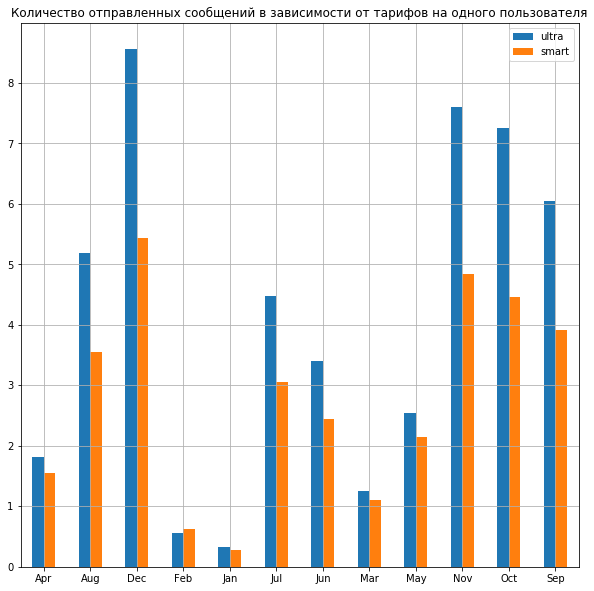

In [99]:
month = ['Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May','Nov', 'Oct', 'Sep']
df4 = pd.DataFrame({'ultra': df_pivot[df_pivot['tariff'] == 'ultra']['count_message/user'].array, 'smart': df_pivot[df_pivot['tariff'] == 'smart']['count_message/user'].array}, index=month)

ax = df4.plot.bar(rot=0, figsize=(10, 10), grid = True)
plt.title('Количество отправленных сообщений в зависимости от тарифов на одного пользователя')

In [100]:
df_pivot[df_pivot['tariff'] == 'ultra']['count_message/user'].mean() / df_pivot[df_pivot['tariff'] == 'smart']['count_message/user'].mean()

1.4682354695828344

Пользователи тарифов Смарт чаще используют смски. Но стоит отметить, что показатели отправок сообщений довольно таки низкие. 

Text(0.5, 1.0, 'Количество потраченных гигабайт в зависимости от тарифов на всех пользователей')

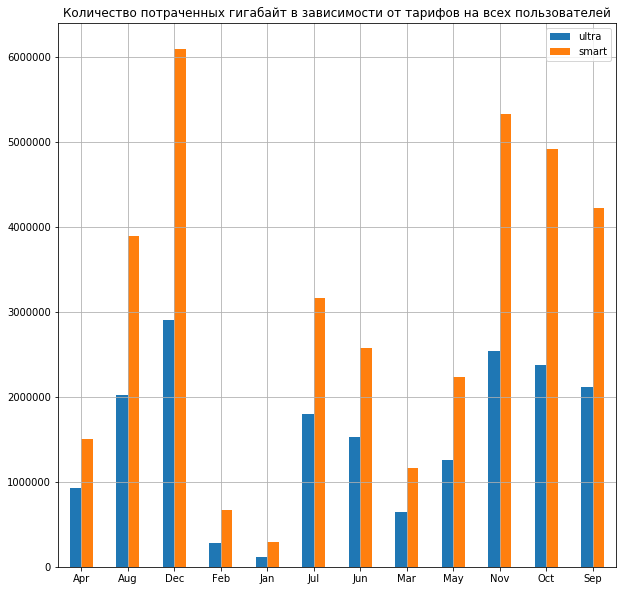

In [101]:
month = ['Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May','Nov', 'Oct', 'Sep']
df5 = pd.DataFrame({'ultra': df_pivot[df_pivot['tariff'] == 'ultra']['mb_used'].array, 'smart': df_pivot[df_pivot['tariff'] == 'smart']['mb_used'].array}, index=month)

ax = df5.plot.bar(rot=0, figsize=(10, 10), grid = True)
plt.title('Количество потраченных гигабайт в зависимости от тарифов на всех пользователей')

Text(0.5, 1.0, 'Количество потраченных Мегабайт в зависимости от тарифов на одного пользователя')

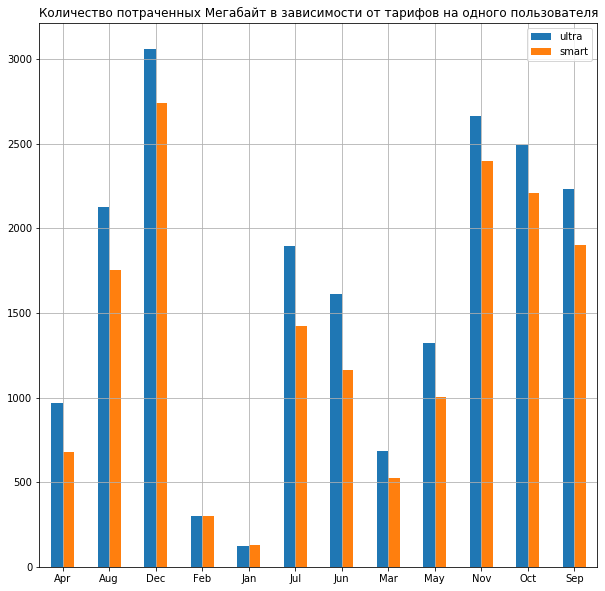

In [102]:
month = ['Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May','Nov', 'Oct', 'Sep']
df6 = pd.DataFrame({'ultra': df_pivot[df_pivot['tariff'] == 'ultra']['mb_used/user'].array, 'smart': df_pivot[df_pivot['tariff'] == 'smart']['mb_used/user'].array}, index=month)

ax = df6.plot.bar(rot=0, figsize=(10, 10), grid = True)
plt.title('Количество потраченных Мегабайт в зависимости от тарифов на одного пользователя')

In [103]:
df_pivot[df_pivot['tariff'] == 'ultra']['mb_used/user'].mean() / df_pivot[df_pivot['tariff'] == 'smart']['mb_used/user'].mean()

1.2002676756144095

Среднее ежемесячное потребление интернета у пользователей тарифов Ультра выше на 20 процентов.

Посчитаем медиану, среднее, дисперсию и стандартное отклонение для данных параметров. 

In [104]:
(df.groupby('tariff')
  .agg({'sum_duration':['median','mean','var','std']})
  .style.format("{:.2f}"))

In [105]:
(df_pivot.groupby('tariff')
  .agg({'sum_duration/user':['median','mean','var','std']})
  .style.format("{:.2f}"))

In [106]:
(df.groupby('tariff')
  .agg({'count_message':['median','mean','var','std']})
  .style.format("{:.2f}"))

In [107]:
(df_pivot.groupby('tariff')
  .agg({'count_message/user':['median','mean','var','std']})
  .style.format("{:.2f}"))

In [108]:
(df.groupby('tariff')
  .agg({'mb_used':['median','mean','var','std']})
  .style.format("{:.2f}"))

In [109]:
(df_pivot.groupby('tariff')
  .agg({'mb_used/user':['median','mean','var','std']})
  .style.format("{:.2f}"))

Вывод по данным цифрам решил перенести в итоговый вывод. 

## Шаг 4. Проверим гипотезы. <a id='step4'></a>

 Проверим гипотезу: средняя выручка пользователей тарифов «Ультра» и «Смарт» различается. Возьмем общепринятый уровень значимости - 5% (по 2,5% c каждой стороны).


<p>Нулевая гипотеза: средняя выручка пользователей тарифа Ультра равна выручке с тарифа Смарт.</p>
<p>Альтернативная гипотеза звучит так: средняя выручка пользователей тарифа Ультра не равна выручке с тарифа Смарт.</p>

In [110]:
ultra = df[df['tariff'] == 'ultra']
smart = df[df['tariff'] == 'smart']

In [111]:
ultra = ultra['revenue_total']
smart = smart['revenue_total']

Проверим, чему раввно отношение дисперсий двух выборок.


In [112]:
np.var(ultra)

145852.13306929116

In [113]:
np.var(smart)

674801.8007252117

In [114]:
np.var(ultra)/np.var(smart)

0.21614069925797974

Как видно, отклонение превышает 20 процентов. Это означает, что при проверки гипотезы нобходимо использовать оператор equal_var = False, который не предполагает равную дисперсию совокупности. 

In [115]:
alpha = .05
results = st.ttest_ind(ultra, smart, equal_var=False)

In [116]:
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.8405224159827356e-241
Отвергаем нулевую гипотезу


С большой долей вероятности можно утверждать, что средняя выручка пользователей тарифов Ультра не равна выручке с тарифов Смарт.

Проверим гипотезу, что средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов. Возьмем общепринятый уровень значимости - 5% (по 2,5% c каждой стороны).
Нулевая гипотеза - средняя выручка пользователей из Москвы равна другим регионам. Альтернативная гипотеза звучит так: средняя выручка пользователей из Москвы не равна другим регионам


In [117]:
moscow = df[df['city'] == 'Москва']
other = df[df['city'] != 'Москва']

In [118]:
moscow = moscow['revenue_total']
other = other['revenue_total']

In [119]:
np.var(moscow)

565921.3608599838

In [120]:
np.var(other)

660945.8783228904

In [121]:
np.var(moscow)/np.var(other)

0.856229502929914

Отношение дисперсий 15%. Также применим equal_var=False при проверки гипотезы.

In [122]:
alpha = .05
results = st.ttest_ind(moscow, other, equal_var=False)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.43013507186038524
Не получилось отвергнуть нулевую гипотезу


Полученное значение p-value говорит о том, что, с вероятностью в почти 45% выручка пользователей из Москва равна с другими регионами. Это явно слишком большая вероятность, чтобы не делать вывод о значимом различии между регионами.

## Шаг 5. Общий вывод. <a id='step5'></a>

Исследовательский анализ показал, что чаще пользователи выбирают более дешевые тарифы, и они принесли наибольшую выручку компании. Если рассматривать выручку с одного человека, то выручка с дорогого тарифа Ультра выше, чем с одного пользователя тарифа Смарт.
Интересный факт, что средняя выручка тарифа Смарт с одного человека составляет 1295 рублей (в 2,35 раза больше чем абонентская плата), а вот абонентская плата в тарифе Ультра практически не отличается от средней. Таким образом бизнесу стоит оптимизировать тарифы, чтобы у пользователей были необходимый объем минут, мегабайт (в зависимости от каждого пользователя).
Стоит также отметить некоторую "сезонность", когда пользователи наиболее активны. К месяцам активности можно отнести Сентябрь, Октябрь, Ноябрь и Декабрь.

Итоговая картина одного пользователя тарифа Смарт (в месяц):
- на связь тратит 33 минуты,
- отправляет 2-3 смс,
- тратит чуть больше 1 Гб

Итоговая картина одного пользователя тарифа Ультра:
- на связь тратит 47 минут,
- отправляет 4 смс,
- тратит чуть больше 1,5 Гб
- отклонение от средних величин выше, чем у пользователя в тарифе Смарт.

